<a href="https://colab.research.google.com/github/VarunNangalia/Hackathon-Loan/blob/master/Hackathon_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hackathon-Loan Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from scipy import stats
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_train_data=pd.read_csv('train_ctrUa4K.csv')
df_test_data=pd.read_csv('test_lAUu6dG.csv')
df_train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(df_train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


There are 7 Columns with missing values

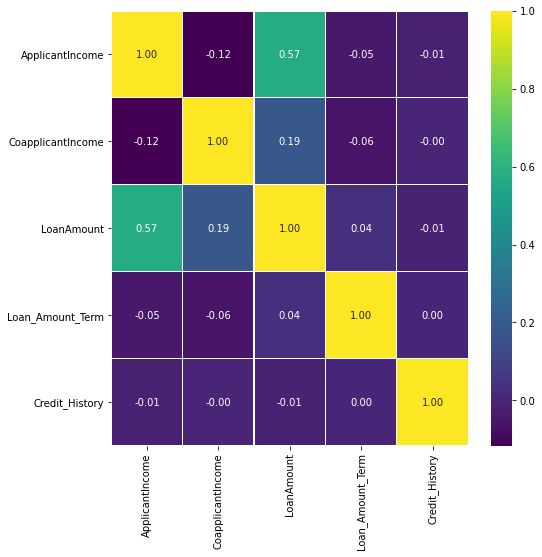

In [4]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train_data.corr(),cmap='viridis',annot=True,linewidths=0.2,fmt='.2f')
plt.show()



1.   LoanAmount and Application Income have moderate amount of Possitive Correlation depicting that a person with high income will demand for a greater amount of Loan.  
2.   Rest of the columns do not depict much correlation



In [5]:
df_test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


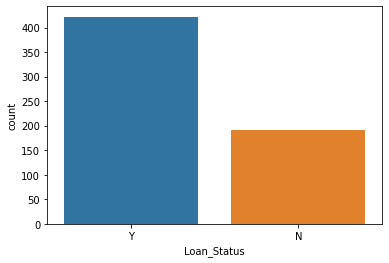

In [6]:
sns.countplot(data =df_train_data, x='Loan_Status')
plt.show()

It is evident that more applicants were provided loan than not yet this is not a case of Imbalance Dataset.

In [7]:
df_train_data.drop(['Loan_ID'],axis=1,inplace=True)
df_train_data_con = df_train_data.select_dtypes(include=np.number)
df_train_data_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [8]:
df_train_data_cat=df_train_data.select_dtypes(exclude=np.number)
df_train_data_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


ApplicantIncome


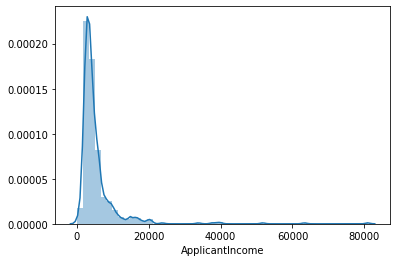

6.539513113994625
CoapplicantIncome


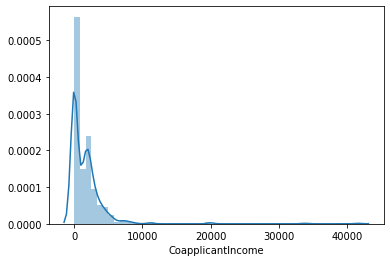

7.491531216657306
LoanAmount


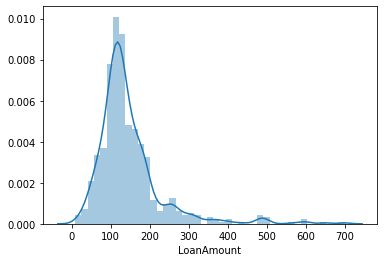

2.677551679256059
Loan_Amount_Term


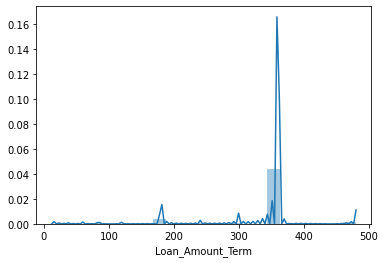

-2.362414124216269
Credit_History


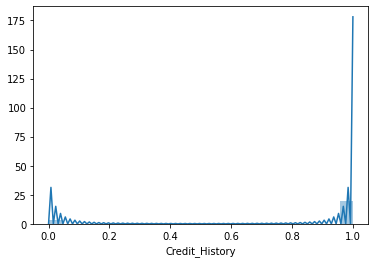

-1.8823610612186696


In [9]:
# to check the data distribution in numerical values
for i in df_train_data_con.columns:
  print(i)
  sns.distplot(df_train_data_con[i])
  plt.show()
  print(df_train_data_con[i].skew())

 

*   There are 5 columns which are considered as Continous. However with further exploring we come to know that columns "Loan_Amount_Term" and "Credit_History" are categorical columns.
*   Columns 'Applicant_Income' and 'Coapplicant_Income' are Possitvely Skewed and we will have to treat that. We can either Scaler our data or use logarithmic transformation for them
*   Column 'Loan_Amount' is not much skewed
 

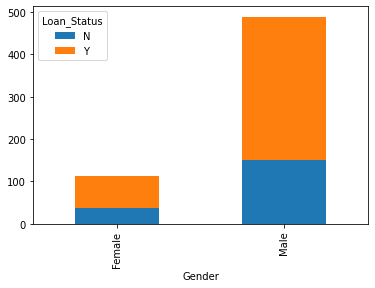

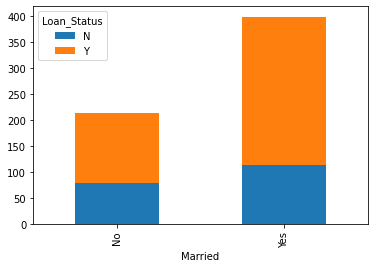

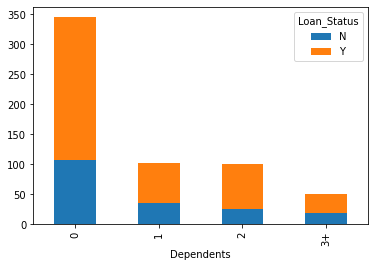

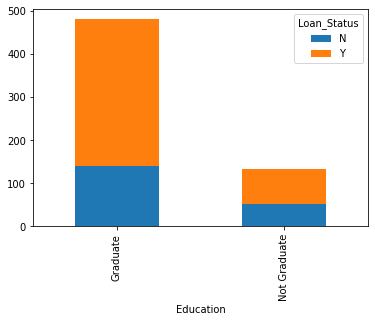

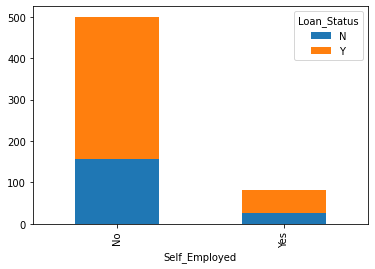

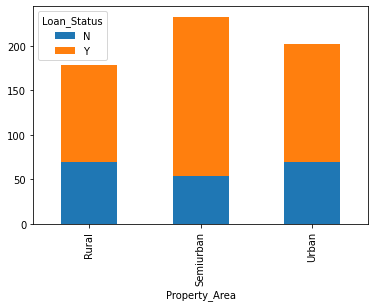

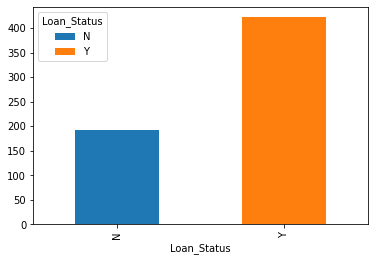

In [10]:
for i in df_train_data_cat.columns:
  df_train_data_cat.groupby(i)['Loan_Status'].value_counts().unstack().plot(kind='bar',stacked=True)

From above we can notice

*   Male Applicants are more than Female Applicants
*   Married applicants have a higher chance of getting a loan than Unmarried. This could due to the reason that Married Applicants have Dual Income's and thus it is safer to provide them a Loan 
*   As the dependency increases the probability of getting a loan decreases
*   Applicants with 0 dependencies have requested more for a loan
*   Probability of a Graduate getting a loan is higher than not a Graduate
*   Applicants seeking loan are the highest from Semi-Urban Region

PS- Alternatively we can also use Sweetviz library in Python for EDA

In [11]:
y_df_train_data=df_train_data['Loan_Status'].copy()
y_df_train_data.replace(['N','Y'],[0,1],inplace=True)
df_train_data.drop('Loan_Status',axis=1,inplace=True)
df_test_data.drop(['Loan_ID'],axis=1,inplace=True)

Creating our basic training and testing data by dropping the target column and unique id column

In [12]:
print('LoanAmount median is',df_train_data['LoanAmount'].median())
print('Gender mode',df_train_data['Gender'].mode())
print('Dependents mode',df_train_data['Dependents'].mode())
print('Married mode',df_train_data['Married'].mode())
print('Self_Employed mode',df_train_data['Self_Employed'].mode())
print('Loan_Amount_Term mode',df_train_data['Loan_Amount_Term'].mode())
print('Credit_History mode',df_train_data['Credit_History'].mode())

LoanAmount median is 128.0
Gender mode 0    Male
dtype: object
Dependents mode 0    0
dtype: object
Married mode 0    Yes
dtype: object
Self_Employed mode 0    No
dtype: object
Loan_Amount_Term mode 0    360.0
dtype: float64
Credit_History mode 0    1.0
dtype: float64


We will now Fill Missing Values. For Categorical values we have filled it using Mode of that column and for Continous we have filled it with Median

In [13]:
df_train_data['Gender']=df_train_data['Gender'].fillna('Male')
df_train_data['Dependents']=df_train_data['Dependents'].fillna('0')
df_train_data['Married']=df_train_data['Married'].fillna("Yes")
df_train_data['Self_Employed']=df_train_data['Self_Employed'].fillna("No")
df_train_data['Loan_Amount_Term']=df_train_data['Loan_Amount_Term'].fillna(360)
df_train_data['Credit_History']=df_train_data['Credit_History'].fillna(1)
df_train_data['LoanAmount']=df_train_data['LoanAmount'].fillna(df_train_data['LoanAmount'].median())
print(df_train_data.isnull().sum())

#Test Data
df_test_data['Gender']=df_test_data['Gender'].fillna('Male')
df_test_data['Dependents']=df_test_data['Dependents'].fillna('0')
df_test_data['Married']=df_test_data['Married'].fillna("Yes")
df_test_data['Self_Employed']=df_test_data['Self_Employed'].fillna("No")
df_test_data['Loan_Amount_Term']=df_test_data['Loan_Amount_Term'].fillna(360)
df_test_data['Credit_History']=df_test_data['Credit_History'].fillna(1)
df_test_data['LoanAmount']=df_test_data['LoanAmount'].fillna(df_train_data['LoanAmount'].median())
print(df_test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#Data Preprocessing

After filling in our missing values we now move to feature engineering

In [14]:
df_train_data['TotalIncome']=df_train_data['ApplicantIncome']+df_train_data['CoapplicantIncome']
df_train_data['ApplicantCoverageRatio']=df_train_data['ApplicantIncome']/df_train_data['LoanAmount']
df_train_data['TotalCoverageRatio']=df_train_data['TotalIncome']/df_train_data['LoanAmount']
df_train_data['LoanPerMonth']=df_train_data['LoanAmount']/df_train_data['Loan_Amount_Term']

#Test Data
df_test_data['TotalIncome']=df_test_data['ApplicantIncome']+df_test_data['CoapplicantIncome']
df_test_data['ApplicantCoverageRatio']=df_test_data['ApplicantIncome']/df_test_data['LoanAmount']
df_test_data['TotalCoverageRatio']=df_test_data['TotalIncome']/df_test_data['LoanAmount']
df_test_data['LoanPerMonth']=df_test_data['LoanAmount']/df_test_data['Loan_Amount_Term']

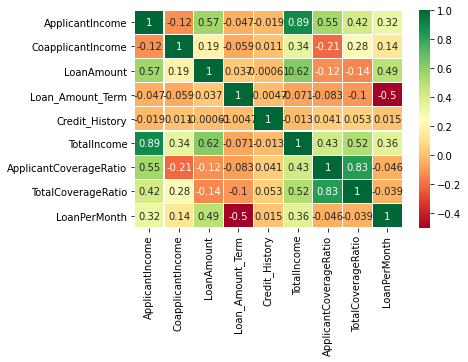

<Figure size 1440x1080 with 0 Axes>

In [15]:
sns.heatmap(df_train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.figure(figsize=(20,15))
plt.show()

We have added 4 columns which are as follows-

*   TotalIncome- This signifies the Total Income of the Applicant along with the Coapplicants Income
*   ApplicantCoverageRatio- This signifies the number of times the loan be be repaid in comparison to the Applicants Individual Income
*   TotalCoverageRatio=This signifies the number of times the loan be be repaid in comparison to the Applicants Total Income
*   LoanPerMonth= Here we are ammortizing the loan amount over the loan tenure


In [16]:
dummies_cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History','Property_Area']
for i in dummies_cols:
  X_Dummy=pd.get_dummies(df_train_data[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  df_train_data = pd.concat([df_train_data,X_Dummy], axis=1)
  df_train_data.drop([i],axis=1,inplace=True)#Altrenatively we could also use 'drop_first=True' in pd.get_dummies as a hyperparameter

Using one hot encoding on Categorical Columns

In [17]:
dummies_cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History','Property_Area']
for i in dummies_cols:
  X_Dummy=pd.get_dummies(df_test_data[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  df_test_data = pd.concat([df_test_data,X_Dummy], axis=1)
  df_test_data.drop([i],axis=1,inplace=True)#Altrenatively we could also use 'drop_first=True' in pd.get_dummies as a hyperparameter

In [18]:
df_test_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome',
       'ApplicantCoverageRatio', 'TotalCoverageRatio', 'LoanPerMonth',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_6.0', 'Loan_Amount_Term_12.0',
       'Loan_Amount_Term_36.0', 'Loan_Amount_Term_60.0',
       'Loan_Amount_Term_84.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_240.0',
       'Loan_Amount_Term_300.0', 'Loan_Amount_Term_350.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [19]:
df_test_data.drop(['Loan_Amount_Term_6.0','Loan_Amount_Term_350.0'],axis=1,inplace=True)

This we have dropped from test as these are single entries due to which a new column was created and we could not apply models to it as the shape of the train and test data changes

In [20]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df_train_data[['CoapplicantIncome','LoanAmount','TotalIncome','ApplicantIncome','ApplicantCoverageRatio','TotalCoverageRatio','LoanPerMonth']] = scaler.fit_transform(df_train_data[['CoapplicantIncome','LoanAmount','TotalIncome','ApplicantIncome','ApplicantCoverageRatio','TotalCoverageRatio','LoanPerMonth']])

#Test Data
df_test_data[['CoapplicantIncome','LoanAmount','TotalIncome','ApplicantIncome','ApplicantCoverageRatio','TotalCoverageRatio','LoanPerMonth']] = scaler.transform(df_test_data[['CoapplicantIncome','LoanAmount','TotalIncome','ApplicantIncome','ApplicantCoverageRatio','TotalCoverageRatio','LoanPerMonth']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


We have used Quantile Scaler as it helps in treating outliers, Alternatively we could also use RobustScaler

#Applying Models
Now as we are done with the basic steps of cleaning our data , now we will apply different models to our dataset.

In [21]:
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 

We first use Pycaret on our original dataset to find out which models would apply best to our dataset.

In [22]:
# !pip install pycaret
# from pycaret.utils import enable_colab
# enable_colab()

In [23]:
# pycaret_data=pd.read_csv('train_ctrUa4K.csv')
# from pycaret.classification import *
# exp_clf101 = setup(data = pycaret_data, target = 'Loan_Status', session_id=123)
# compare_models()

In [24]:
#Logistic Regression-Train
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8292682926829268
Precision score is 0.822429906542056
Recall score is 0.9777777777777777
Confusion Matrix is 
 [[14 19]
 [ 2 88]]


In [25]:
#Random Forest
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
RFmodel=RandomForestClassifier(n_estimators=1000,n_jobs=100,random_state=0, min_samples_leaf=4)
RFmodel.fit(X_train,y_train)
y_pred=RFmodel.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8373983739837398
Precision score is 0.8301886792452831
Recall score is 0.9777777777777777
Confusion Matrix is 
 [[15 18]
 [ 2 88]]


In [26]:
#Gradient Boosting
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
gb_clf= GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
y_pred=gb_clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8211382113821138
Precision score is 0.8269230769230769
Recall score is 0.9555555555555556
Confusion Matrix is 
 [[15 18]
 [ 4 86]]


In [27]:
#Decision Tree
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
dt_clf=DecisionTreeClassifier(max_depth=1,random_state=0)#1)this is our weak classifier,2)Max_depth has to be one else it will become a stronger classifier which would be beneficial here but would affect our ADAboost in a negative manner 
dt_clf.fit(X_train,y_train)
dt_score=dt_clf.score(X_test,y_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))
#AdaBoost
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
ada_clf=AdaBoostClassifier(base_estimator=dt_clf,random_state=0)
ada_clf.fit(X_train,y_train)
ada_score=ada_clf.score(X_test,y_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8211382113821138
Precision score is 0.8269230769230769
Recall score is 0.9555555555555556
Confusion Matrix is 
 [[15 18]
 [ 4 86]]
Test score is  0.8211382113821138
Precision score is 0.8269230769230769
Recall score is 0.9555555555555556
Confusion Matrix is 
 [[15 18]
 [ 4 86]]


In [28]:
#KNN
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8048780487804879
Precision score is 0.8173076923076923
Recall score is 0.9444444444444444
Confusion Matrix is 
 [[14 19]
 [ 5 85]]


In [29]:
#Ridge Classifier
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8292682926829268
Precision score is 0.822429906542056
Recall score is 0.9777777777777777
Confusion Matrix is 
 [[14 19]
 [ 2 88]]


In [30]:
#LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfld = LinearDiscriminantAnalysis()
clfld.fit(X_train, y_train)
y_pred=clfld.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8292682926829268
Precision score is 0.822429906542056
Recall score is 0.9777777777777777
Confusion Matrix is 
 [[14 19]
 [ 2 88]]


In [31]:
#SVM
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
model = svm.SVC(kernel='linear', C = 1)
svmc= model.fit(X_train, y_train)
y_pred=svmc.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8292682926829268
Precision score is 0.822429906542056
Recall score is 0.9777777777777777
Confusion Matrix is 
 [[14 19]
 [ 2 88]]


In [32]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

     |████████████████████████████████| 66.1MB 46kB/s 


In [33]:
#Catboost

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from catboost import CatBoostClassifier
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
model=CatBoostClassifier()
parameters = {'depth': sp_randInt(4, 10),'learning_rate' : sp_randFloat(),'iterations': sp_randInt(10, 100)}
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,cv =3, n_iter =9, n_jobs=-1)
randm.fit(X_train, y_train)
y_pred=randm.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

0:	learn: 0.6606546	total: 62.1ms	remaining: 1.36s
1:	learn: 0.6296705	total: 72.8ms	remaining: 764ms
2:	learn: 0.6040729	total: 82.8ms	remaining: 552ms
3:	learn: 0.5795248	total: 93ms	remaining: 442ms
4:	learn: 0.5576997	total: 103ms	remaining: 372ms
5:	learn: 0.5410786	total: 113ms	remaining: 321ms
6:	learn: 0.5248250	total: 123ms	remaining: 282ms
7:	learn: 0.5073474	total: 134ms	remaining: 251ms
8:	learn: 0.4950153	total: 150ms	remaining: 233ms
9:	learn: 0.4864899	total: 150ms	remaining: 196ms
10:	learn: 0.4716740	total: 161ms	remaining: 175ms
11:	learn: 0.4610627	total: 171ms	remaining: 156ms
12:	learn: 0.4509324	total: 181ms	remaining: 139ms
13:	learn: 0.4418746	total: 191ms	remaining: 123ms
14:	learn: 0.4308309	total: 201ms	remaining: 107ms
15:	learn: 0.4224143	total: 211ms	remaining: 92.2ms
16:	learn: 0.4091040	total: 221ms	remaining: 77.9ms
17:	learn: 0.4014733	total: 230ms	remaining: 64ms
18:	learn: 0.3926761	total: 241ms	remaining: 50.7ms
19:	learn: 0.3845933	total: 251ms	rem

In [34]:
#Ensemble of top 3 models
classifier3=LinearDiscriminantAnalysis()
classifier7=RidgeClassifier(random_state=0) # to prevent overfitting of the data
classifier8=CatBoostClassifier()

classifier_list=[classifier3,classifier7,classifier8]

m_classifier=LogisticRegression()
sclf=StackingClassifier(classifiers=classifier_list,meta_classifier=m_classifier)
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
# Code starts here

sclf.fit(X_train,y_train)
y_pred=sclf.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Learning rate set to 0.007604
0:	learn: 0.6890270	total: 4.58ms	remaining: 4.57s
1:	learn: 0.6852738	total: 7.94ms	remaining: 3.96s
2:	learn: 0.6816989	total: 11.6ms	remaining: 3.86s
3:	learn: 0.6776538	total: 15.8ms	remaining: 3.94s
4:	learn: 0.6741197	total: 19.4ms	remaining: 3.87s
5:	learn: 0.6702829	total: 23.1ms	remaining: 3.83s
6:	learn: 0.6664798	total: 26.8ms	remaining: 3.79s
7:	learn: 0.6632289	total: 30.2ms	remaining: 3.75s
8:	learn: 0.6596408	total: 33.7ms	remaining: 3.71s
9:	learn: 0.6564203	total: 37.3ms	remaining: 3.7s
10:	learn: 0.6524970	total: 40.9ms	remaining: 3.68s
11:	learn: 0.6490070	total: 44.5ms	remaining: 3.66s
12:	learn: 0.6460056	total: 48.1ms	remaining: 3.65s
13:	learn: 0.6426989	total: 51.7ms	remaining: 3.64s
14:	learn: 0.6391673	total: 55.3ms	remaining: 3.63s
15:	learn: 0.6359873	total: 58.8ms	remaining: 3.62s
16:	learn: 0.6327198	total: 62.3ms	remaining: 3.6s
17:	learn: 0.6300441	total: 63.1ms	remaining: 3.44s
18:	learn: 0.6265993	total: 66.6ms	remaining: 

In [35]:
#XG Boost #XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
xgb_model = XGBClassifier(base_estimator=ridge, random_state=0)
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Test score is ",score)
print("Precision score is",precision_score(y_test,y_pred))
print("Recall score is",recall_score(y_test,y_pred))
print("Confusion Matrix is \n",confusion_matrix(y_test,y_pred))

Test score is  0.8373983739837398
Precision score is 0.8365384615384616
Recall score is 0.9666666666666667
Confusion Matrix is 
 [[16 17]
 [ 3 87]]


Submitting the best Model Catboost or Ensemble 

In [36]:
submission_test=pd.read_csv('test_lAUu6dG.csv')
test_pred = sclf.predict(df_test_data)
submission = pd.DataFrame({'Loan_ID':submission_test['Loan_ID'],'Loan_Status':test_pred})
submission['Loan_Status']= submission['Loan_Status'].map({1:'Y',0:'N'})

#Visualize the first 5 rows
submission.head()


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [37]:
filename = 'Loan_Prediction_Test2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Loan_Prediction_Test2.csv
